In [2]:
from globalfunc import *

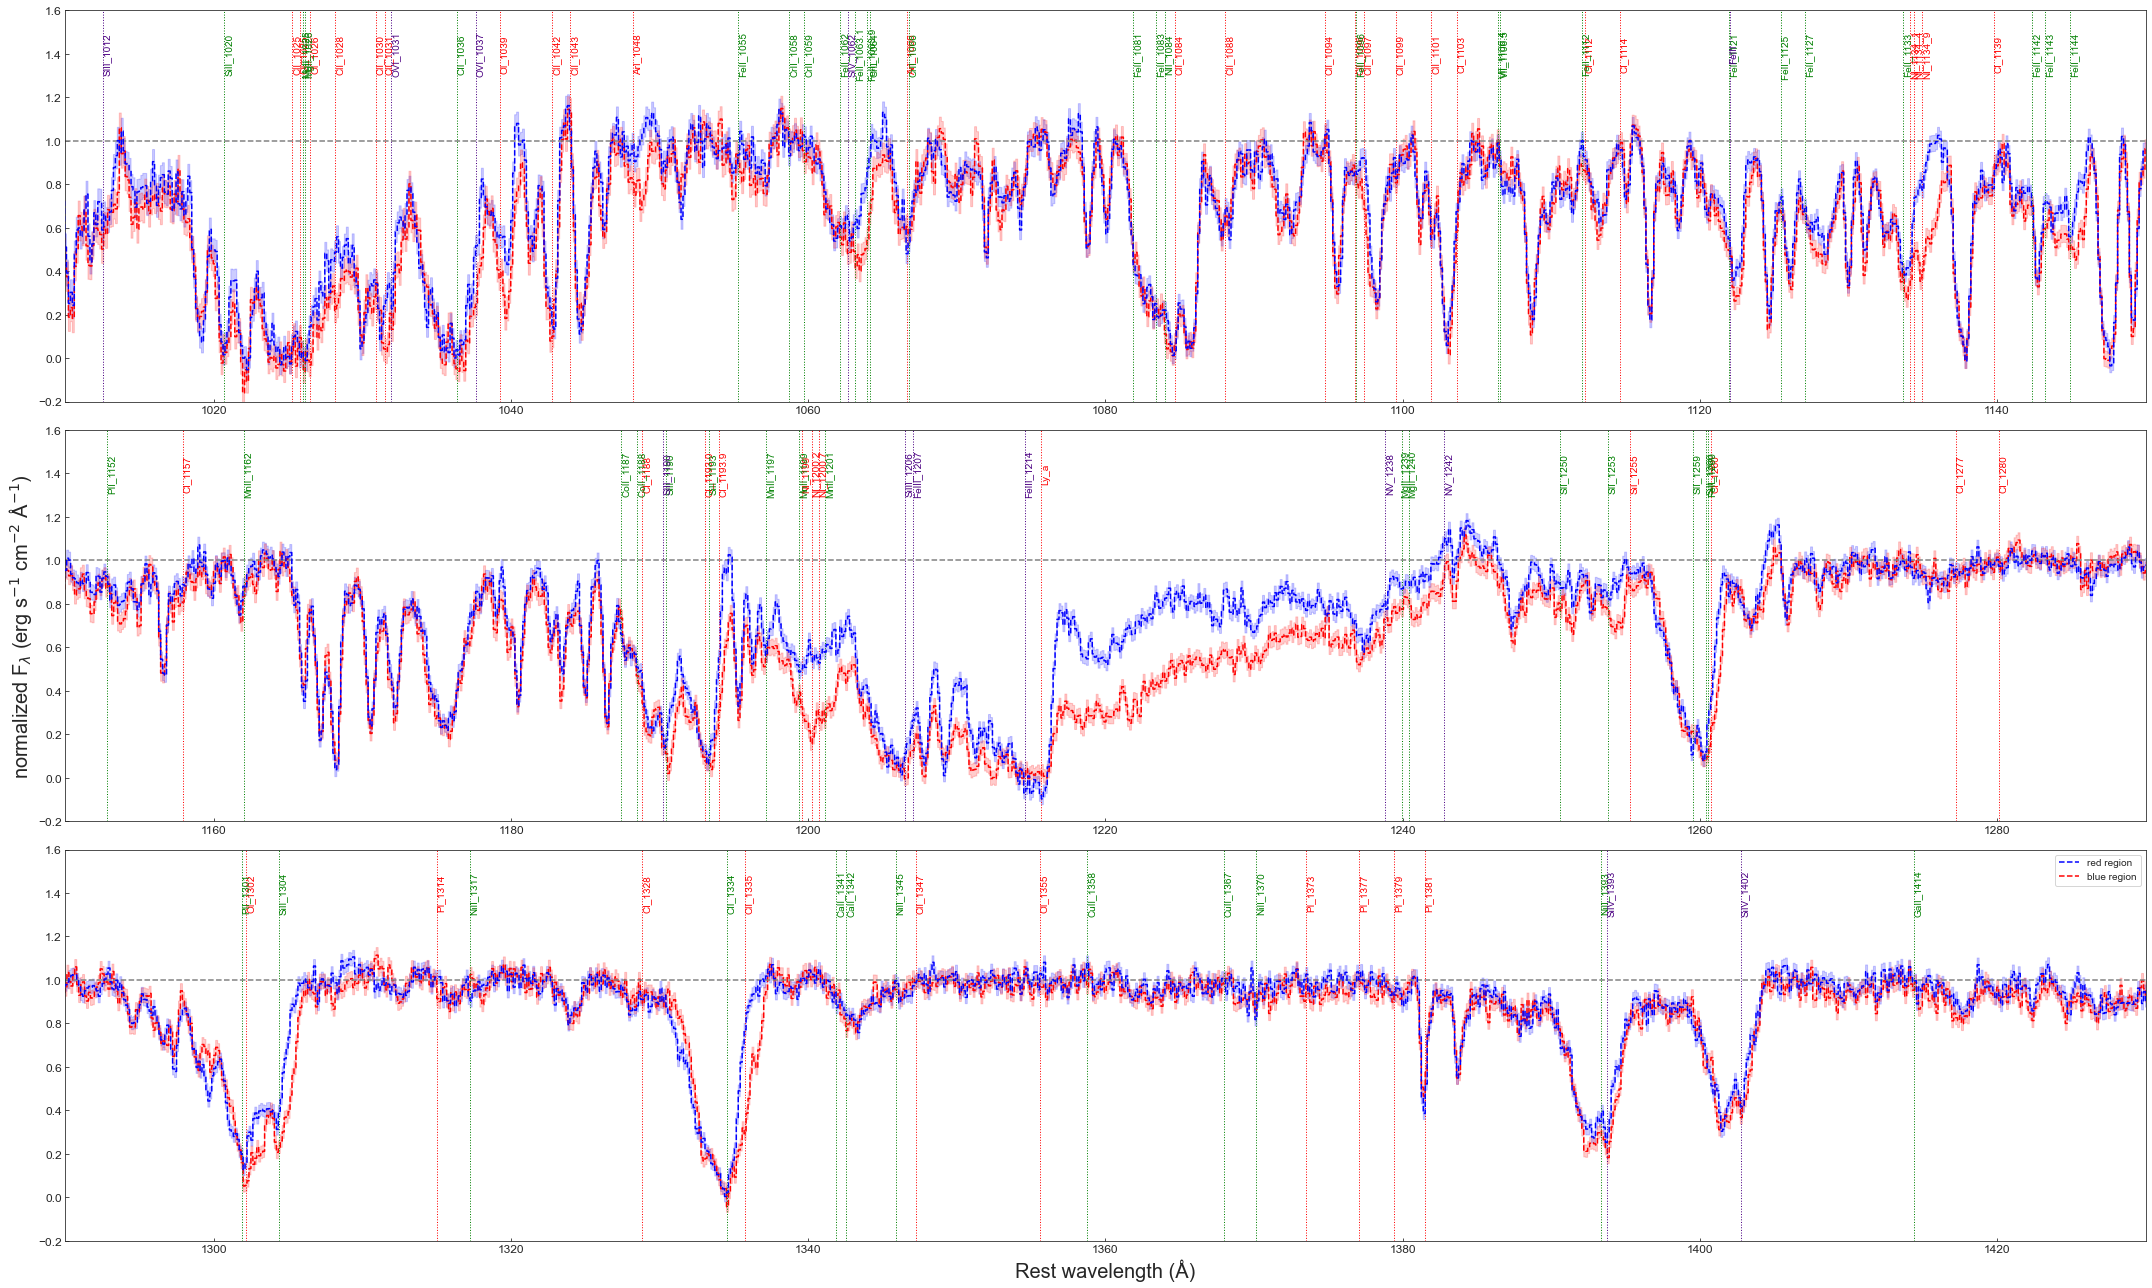

In [3]:
# plotting the spectra

fig, ax = plt.subplots(3,1,figsize=(30, 18),
#                       dpi=900 
                        )

for i in range(3):
    ax[i].plot(nwavelength, rnorm, drawstyle="steps-mid", color=ap1color,ls = '--', zorder=3, label = 'red region')
    ax[i].fill_between(nwavelength, rnorm-rnorm_err, rnorm+rnorm_err, step='mid', color=ap1color, alpha =0.2)
    ax[i].plot(nwavelength, bnorm, drawstyle="steps-mid", color=ap0color,ls = '--', zorder=2, label = 'blue region')
    ax[i].fill_between(nwavelength, bnorm-bnorm_err, bnorm+bnorm_err, step='mid', color=ap0color, alpha =0.2)
    ax[i].axhline(y=1, color='gray',ls = '--')

    for line in rlines.items():
        ax[i].axvline(line[1], linestyle=":", color="red", lw=1)
        ax[i].text(line[1],1.4, line[0],color="red",rotation=90, verticalalignment='center',clip_on=True)
    for line in glines.items():
        ax[i].axvline(line[1], linestyle=":", color="green", lw=1)
        ax[i].text(line[1],1.4, line[0],color="green",rotation=90, verticalalignment='center',clip_on=True)
    for line in tlines.items():
        ax[i].axvline(line[1], linestyle=":", color="indigo", lw=1)
        ax[i].text(line[1],1.4, line[0],color="indigo",rotation=90, verticalalignment='center',clip_on=True)


# define the wavelength limits for each subplot
ax[0].axis([1010,1150,-0.2,1.6])
ax[1].axis([1150,1290,-0.2,1.6])
ax[2].axis([1290,1430,-0.2,1.6])

plt.xlabel("Rest wavelength (Å)", fontsize=20)
ax[1].set_ylabel("normalized F$_{\\lambda}$ (erg s$^{-1}$ cm$^{-2}$ Å$^{-1}$)", fontsize=20)
plt.tight_layout()
plt.legend()
# plt.savefig('improved.png')
plt.show()

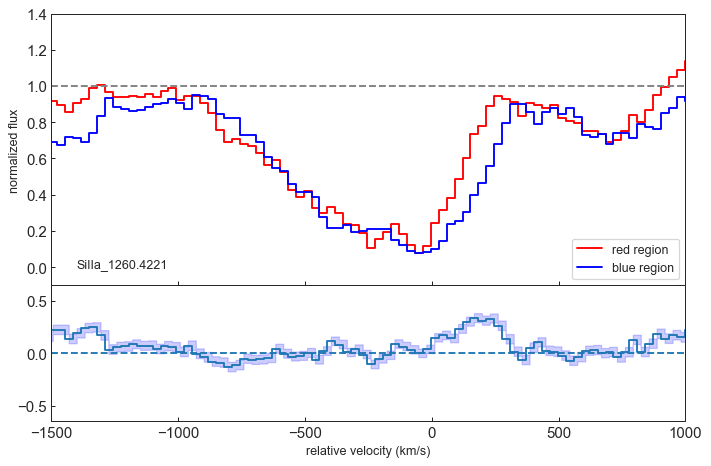

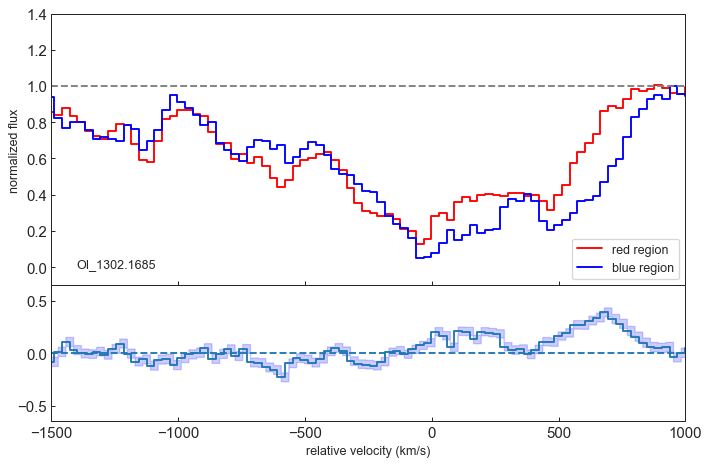

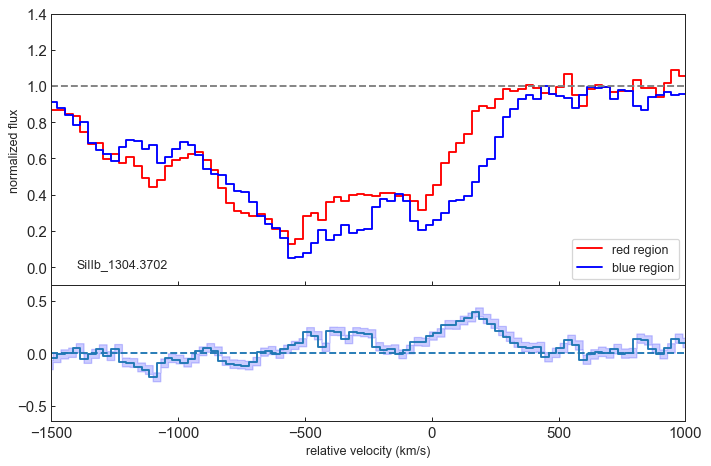

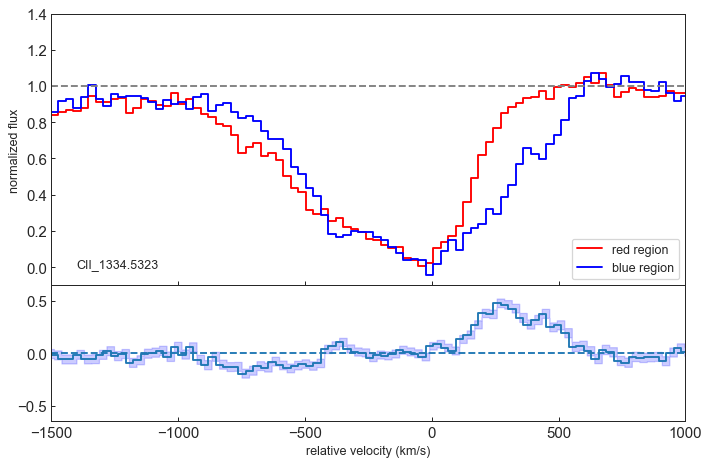

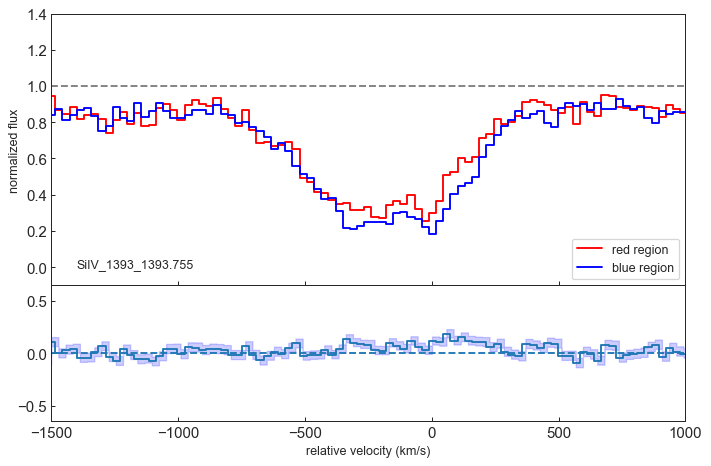

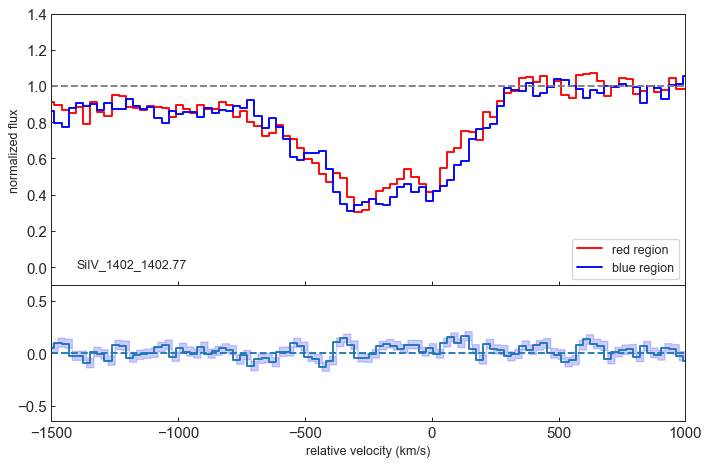

In [4]:
# uncomment the following to plot the velocity profiles
for j in abslines.items(): # for the absorption lines lambda > Lya
    vel_prof(rnorm,bnorm,j)

# use bluelines1.items() or bluelines.items() for lambda < Lya

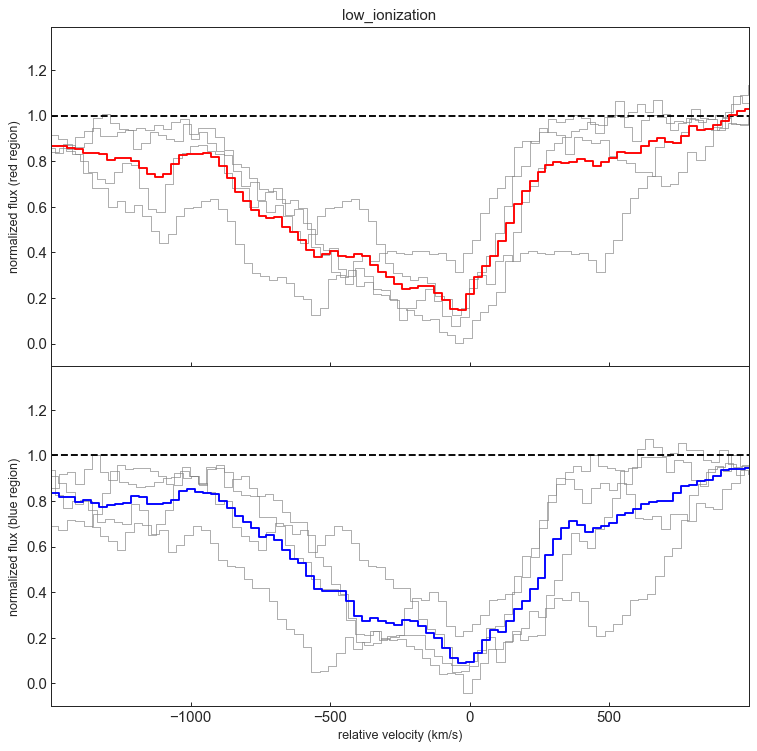

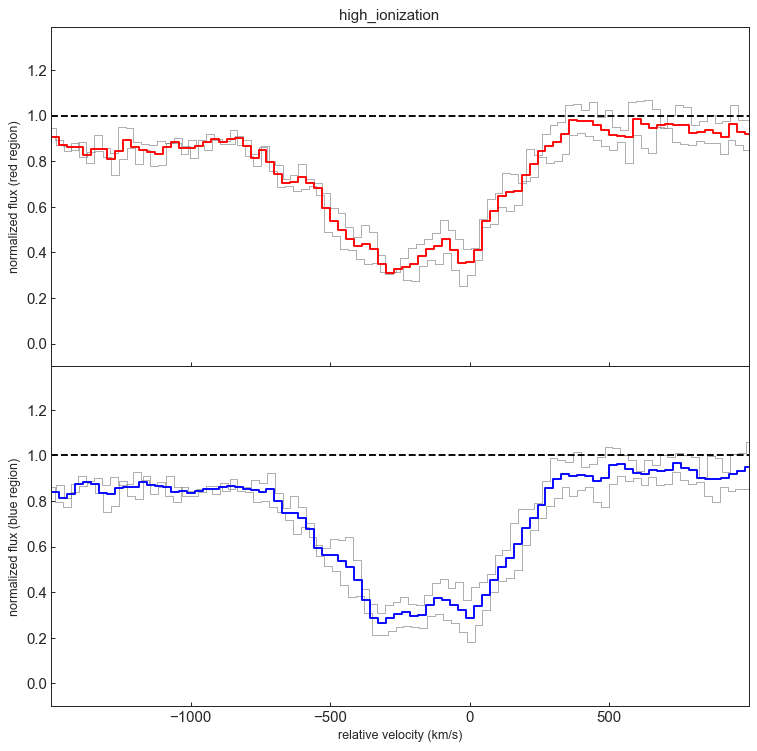

In [5]:
# plotting the AVERAGE profile for the absorption lines
avg_velpro(low_ion,(rnorm,bnorm))
avg_velpro(high_ion,(rnorm,bnorm))

-----------------------------------------------------
EW for ('SiIIa', 1260.4221) is 2.847 +/- 0.181 Angstrom
EW for ('OI', 1302.1685) is 3.350 +/- 0.191 Angstrom
EW for ('SiIIb', 1304.3702) is 3.124 +/- 0.203 Angstrom
EW for ('CII', 1334.5323) is 3.332 +/- 0.205 Angstrom
EW for ('SiIV_1393', 1393.755) is 2.674 +/- 0.217 Angstrom
EW for ('SiIV_1402', 1402.77) is 2.098 +/- 0.207 Angstrom
-----------------------------------------------------
-----------------------------------------------------
EW for ('SiIIa', 1260.4221) is 3.122 +/- 0.200 Angstrom
EW for ('OI', 1302.1685) is 3.454 +/- 0.213 Angstrom
EW for ('SiIIb', 1304.3702) is 3.755 +/- 0.209 Angstrom
EW for ('CII', 1334.5323) is 3.663 +/- 0.224 Angstrom
EW for ('SiIV_1393', 1393.755) is 3.002 +/- 0.224 Angstrom
EW for ('SiIV_1402', 1402.77) is 2.261 +/- 0.233 Angstrom
-----------------------------------------------------


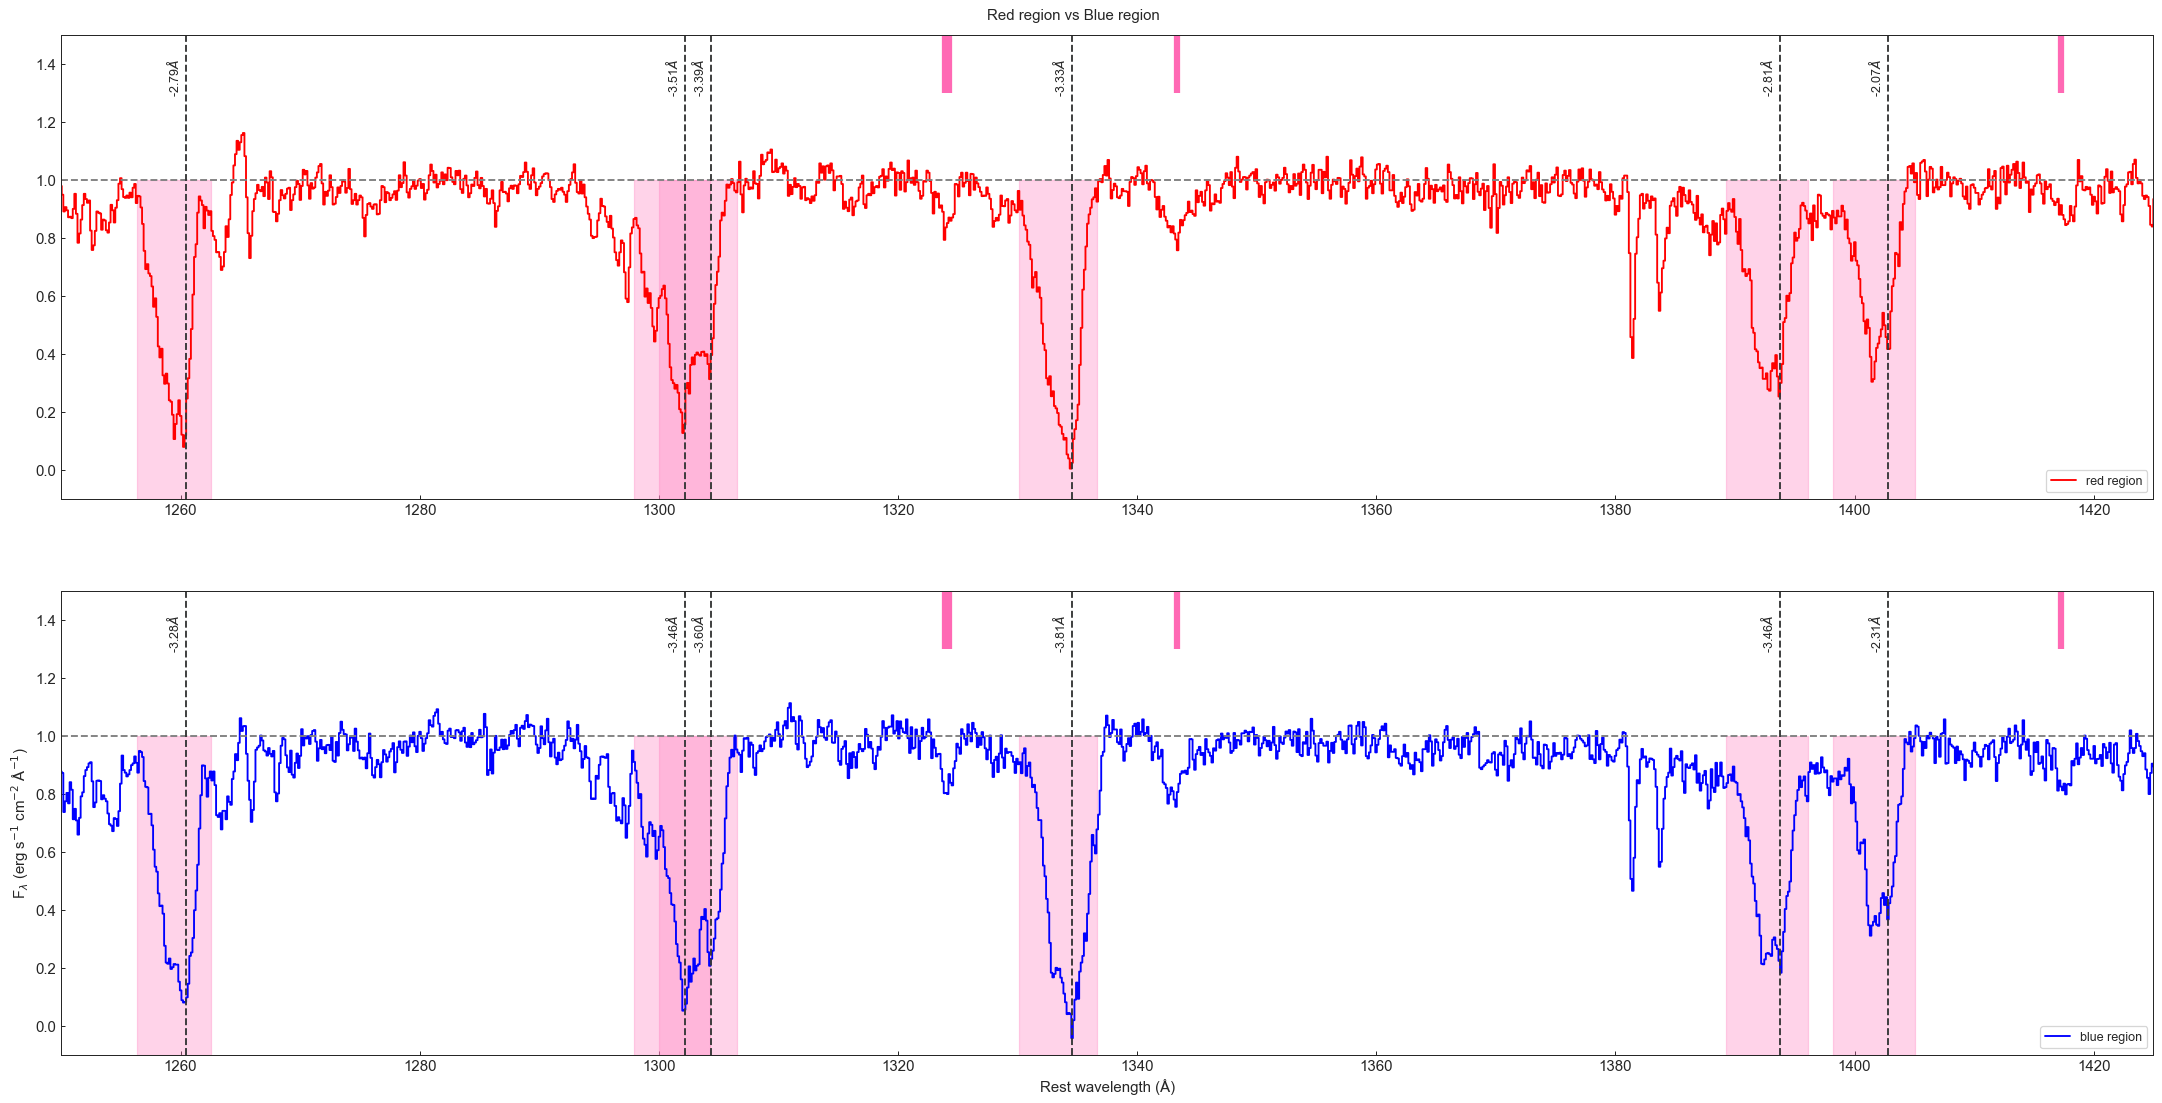

In [6]:
# ew_calc(nwavelength, (rnorm,), (rnorm_err,), abslines)
# ew_calc(nwavelength, (bnorm,), (bnorm_err,), abslines)
ew_calc(nwavelength, (rnorm,bnorm), (rnorm_err,bnorm_err), abslines)

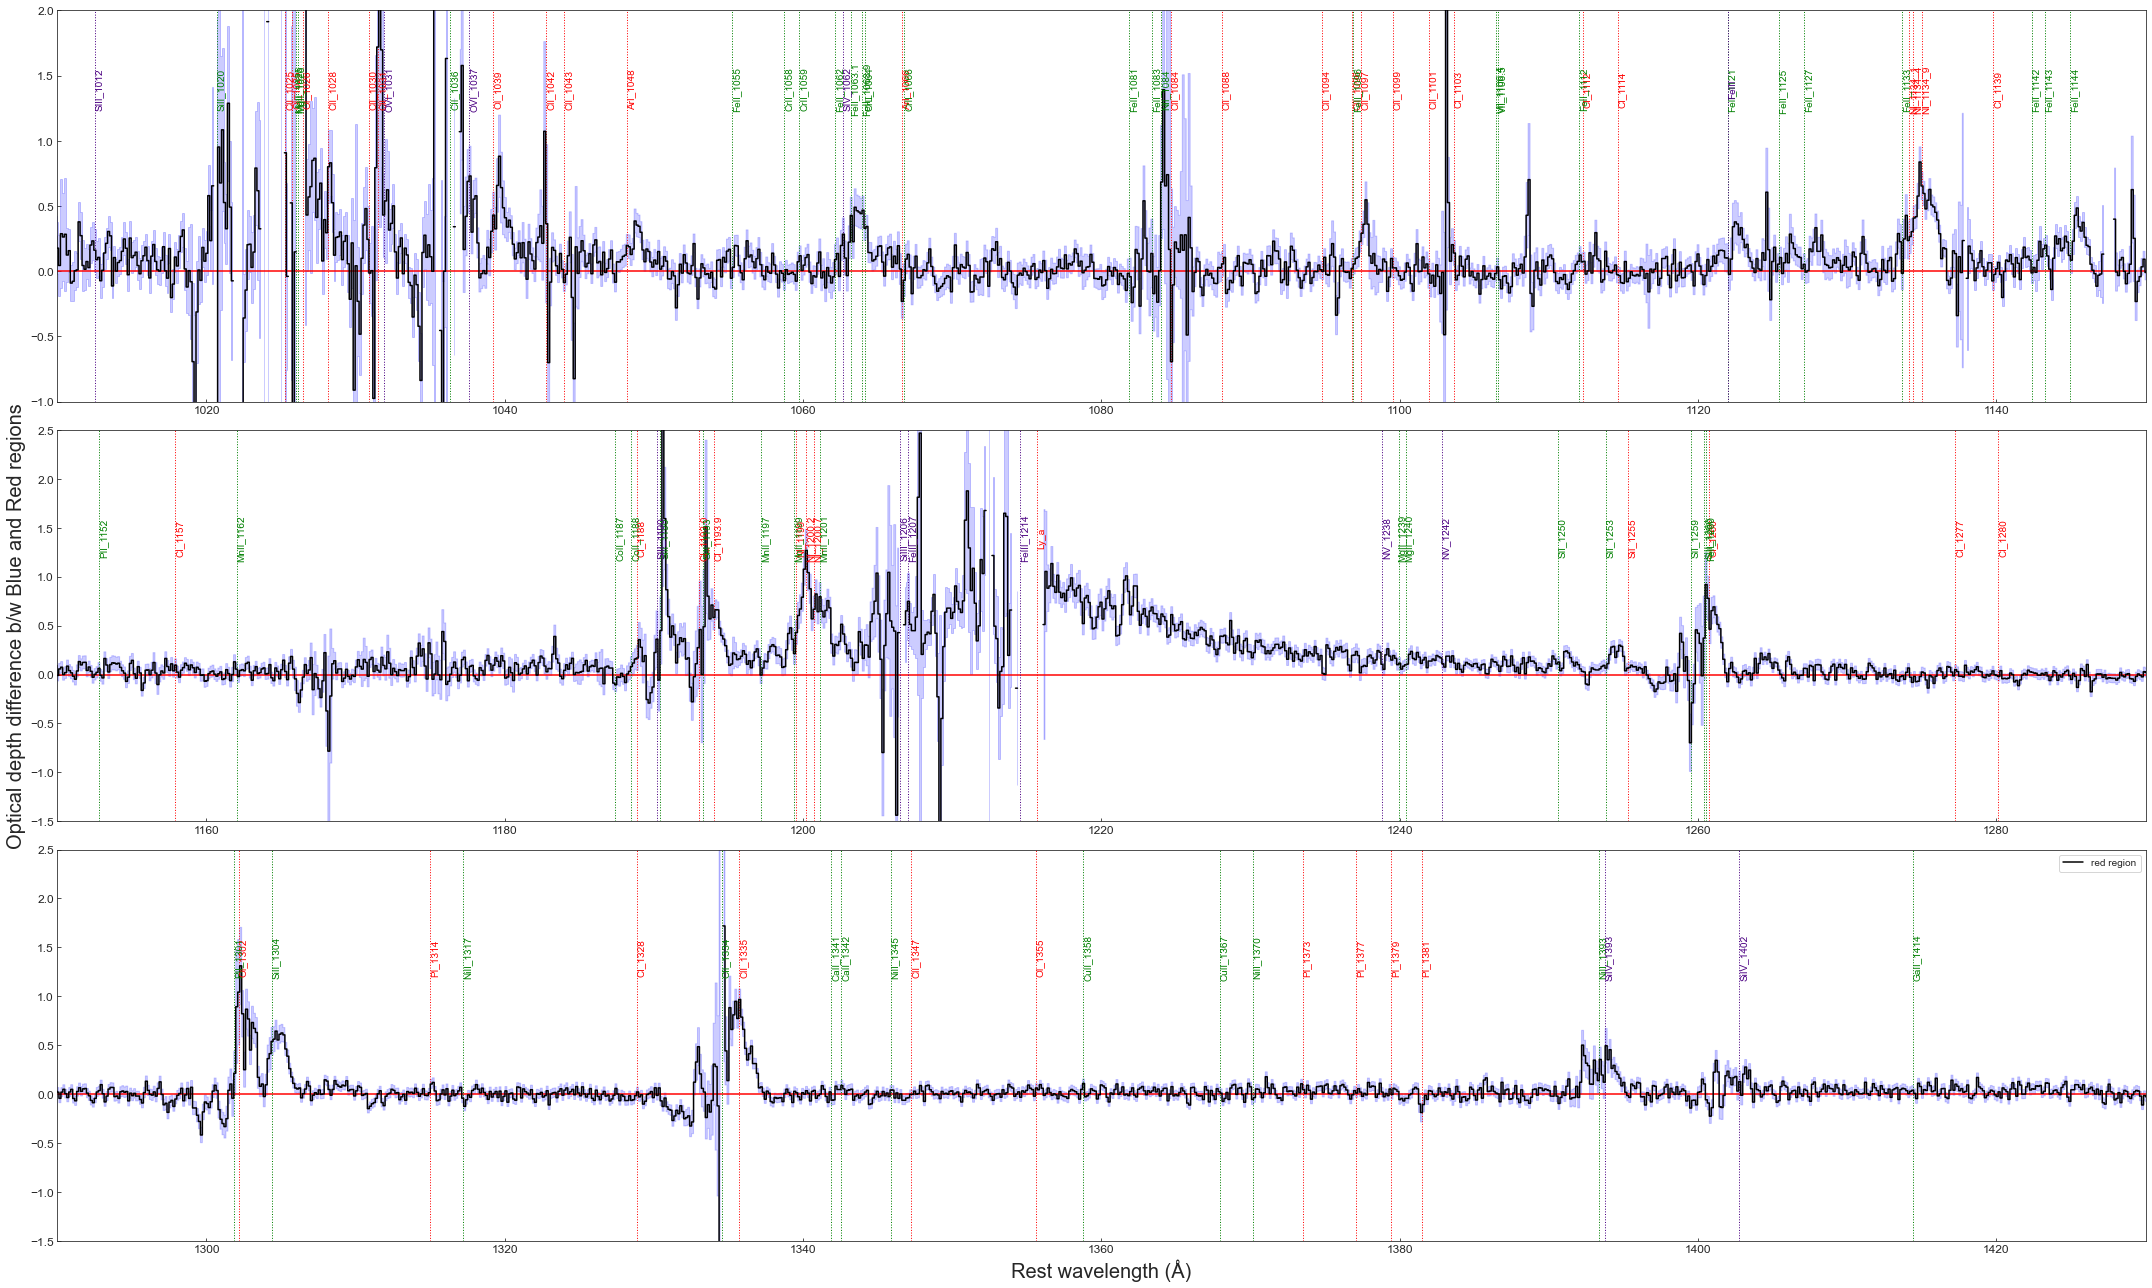

In [38]:
# Optical depth plots vs wavelength
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning) 
od_r = np.log(1/rnorm.value)
od_b = np.log(1/bnorm.value)
od_r_err = rnorm_err.value/rnorm.value
od_b_err = bnorm_err.value/bnorm.value
od_diff_err = np.sqrt(od_r_err**2 + od_b_err**2)

fig, ax = plt.subplots(3,1,figsize=(30, 18),
#                  dpi=900
                )
for i in range(3):
    ax[i].plot(nwavelength, od_b-od_r, drawstyle="steps-mid", color = 'black', zorder=3, label = 'red region')
    ax[i].fill_between(nwavelength, od_b-od_r-od_diff_err, od_b-od_r+od_diff_err, step='mid', color=ap1color, alpha =0.2)
    ax[i].axhline(y=0, color='red', ls = '-')
    for line in rlines.items():
        ax[i].axvline(line[1], linestyle=":", color="red", lw=1)
        ax[i].text(line[1],1.4, line[0],color="red",rotation=90, verticalalignment='center',clip_on=True)
    for line in glines.items():
        ax[i].axvline(line[1], linestyle=":", color="green", lw=1)
        ax[i].text(line[1],1.4, line[0],color="green",rotation=90, verticalalignment='center',clip_on=True)
    for line in tlines.items():
        ax[i].axvline(line[1], linestyle=":", color="indigo", lw=1)
        ax[i].text(line[1],1.4, line[0],color="indigo",rotation=90, verticalalignment='center',clip_on=True)


    
ax[0].axis([1010,1150,-1,2])
ax[1].axis([1150,1290,-1.5,2.5])
ax[2].axis([1290,1430,-1.5,2.5])


# plot_lines(ax1,ax2,ax3,1.4,'y')
plt.xlabel("Rest wavelength (Å)", fontsize=20)
ax[1].set_ylabel("Optical depth difference b/w Blue and Red regions", fontsize=20)
plt.tight_layout()
plt.legend()
plt.savefig('diff_line_optdepth.png')
plt.show()

log(N) for SiIIa (red region) is 14.538426 +/- 0.050030
log(N) for SiIIa (blue region) is 14.479094 +/- 0.052542
log(N) for CII (red region) is nan +/- 0.040897
log(N) for CII (blue region) is nan +/- 0.027190
log(N) for SiIV_1393 (red region) is 14.663810 +/- 0.042827
log(N) for SiIV_1393 (blue region) is 14.774606 +/- 0.047127
log(N) for SiIV_1402 (red region) is 14.747986 +/- 0.053251
log(N) for SiIV_1402 (blue region) is 14.878732 +/- 0.054061


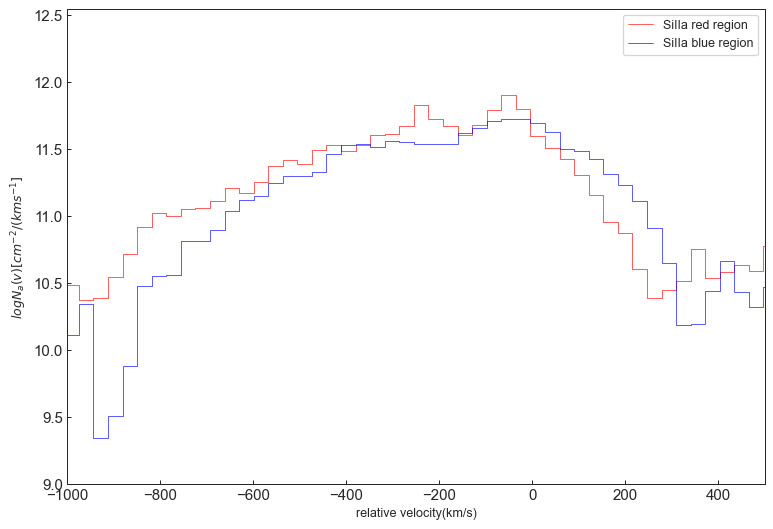

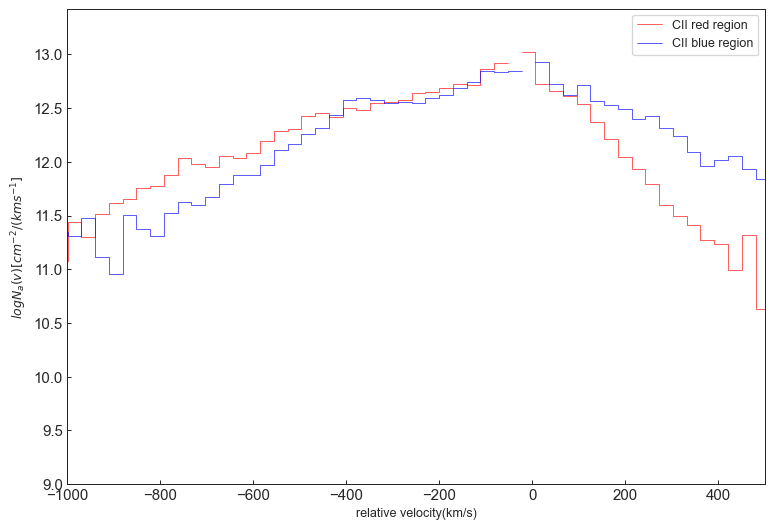

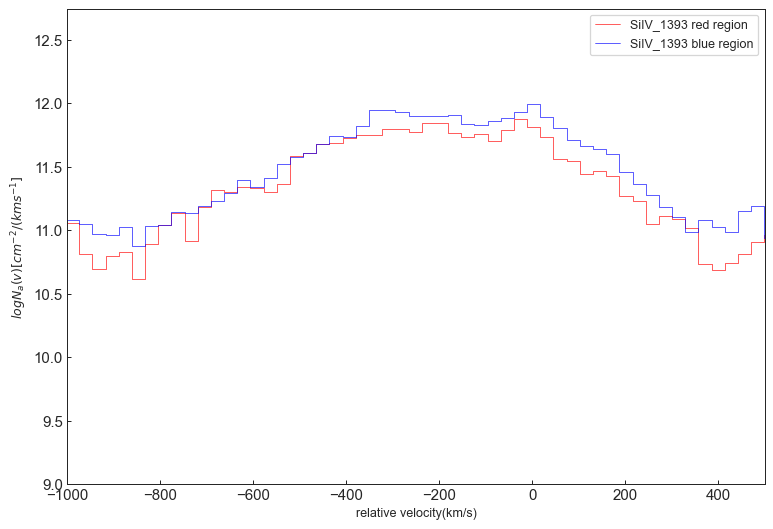

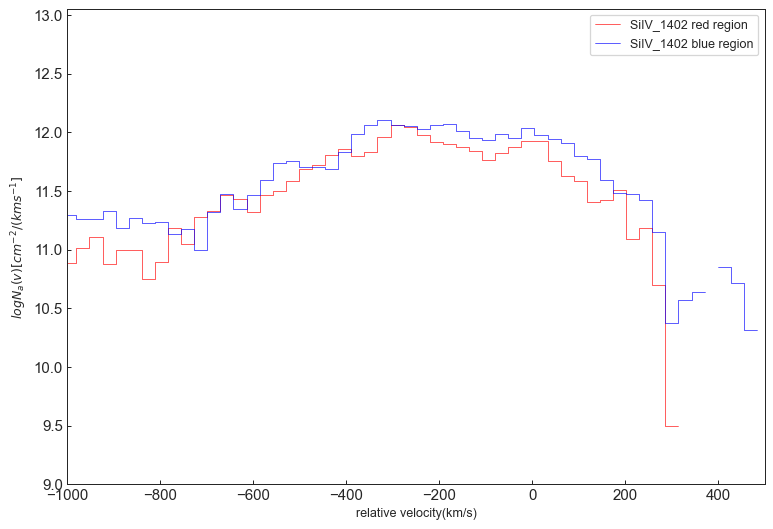

In [8]:
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning) 
# plots
fig = plt.figure(num=1,figsize=(10,7),dpi=90)
cold_prof2(("SiIIa", 1260.4221),1.180,rnorm,'red',1)
cold_prof2(("SiIIa", 1260.4221),1.180,bnorm,'blue',1)

# ------------------------------------------------------------------
# fig = plt.figure(num=2,figsize=(10,7),dpi=90)
# cold_prof(lines_to_measure[-2],0.513,rnorm,'red')
# cold_prof(lines_to_measure[-1],0.254,rnorm,'red')


# fig = plt.figure(num=3,figsize=(10,7),dpi=90)
# cold_prof(lines_to_measure[-2],0.513,bnorm,'blue')
# cold_prof(lines_to_measure[-1],0.254,bnorm,'blue')
# ------------------------------------------------------------------

fig = plt.figure(num=4,figsize=(10,7),dpi=90)
cold_prof2(("CII", 1334.5323),1.28E-01,rnorm,'red',1) 
cold_prof2(("CII", 1334.5323),1.28E-01,bnorm,'blue',1)

fig = plt.figure(num=5,figsize=(10,7),dpi=90)
cold_prof2(('SiIV_1393', 1393.7550),5.13E-01,rnorm,'red',1) 
cold_prof2(('SiIV_1393', 1393.7550),5.13E-01,bnorm,'blue',1)

fig = plt.figure(num=6,figsize=(10,7),dpi=90)
cold_prof2(('SiIV_1402', 1402.77),2.54E-01,rnorm,'red',1) 
cold_prof2(('SiIV_1402', 1402.77),2.54E-01,bnorm,'blue',1)
#f-values from Donald C. Morton 10.1086/377639

log(N) for CII (red region) is 15.527232 +/- 0.037800
log(N) for SiIIa (red region) is 14.430143 +/- 0.046764


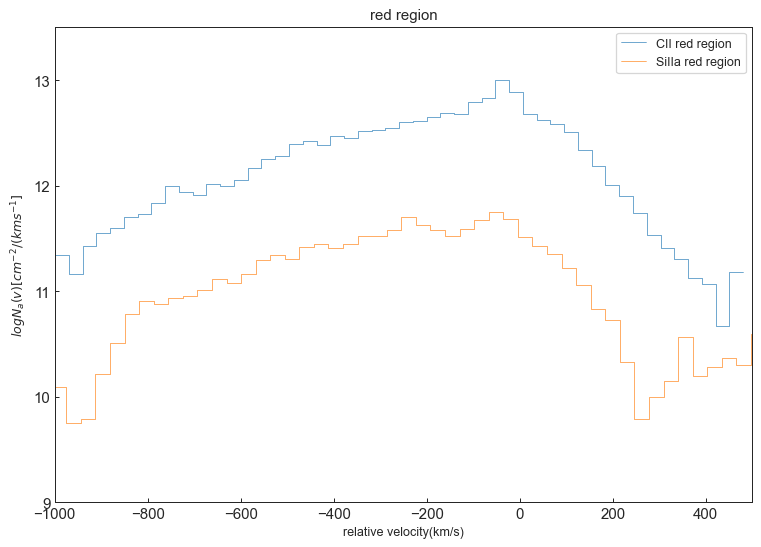

In [9]:
fig = plt.figure(num=1,figsize=(10,7),dpi=90)
cold_prof2(("CII", 1334.5323),1.28E-01,rnorm,'red')
cold_prof2(("SiIIa", 1260.4221),1.180,rnorm,'red')

log(N) for NI_1200.2 (red region) is 15.445825 +/- 0.042052
log(N) for NI_1200.2 (blue region) is 15.654550 +/- 0.042224
log(N) for NI_1134_9 (red region) is 15.624038 +/- 0.053763
log(N) for NI_1134_9 (blue region) is 15.871887 +/- 0.048887
log(N) for FeII_1142 (red region) is 16.694953 +/- 0.057258
log(N) for FeII_1142 (blue region) is 16.705555 +/- 0.059252
log(N) for FeII_1143 (red region) is 15.945490 +/- 0.056880
log(N) for FeII_1143 (blue region) is 16.025170 +/- 0.052333
log(N) for FeII_1144 (red region) is 15.316090 +/- 0.052794
log(N) for FeII_1144 (blue region) is 15.484853 +/- 0.048206


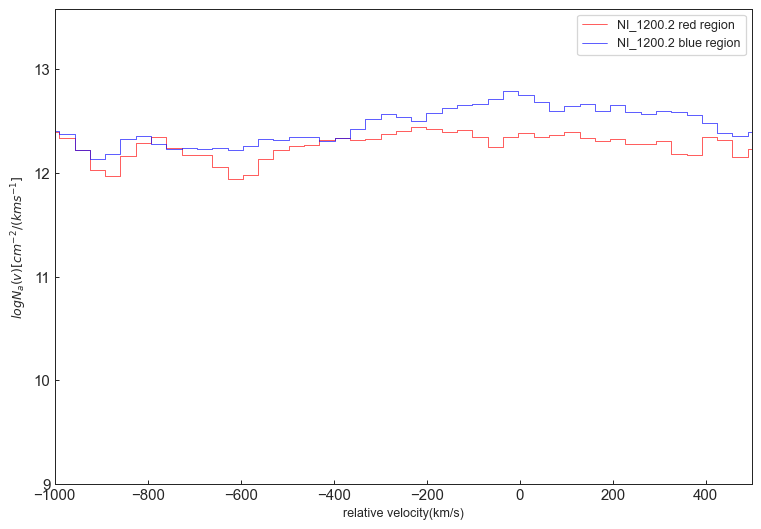

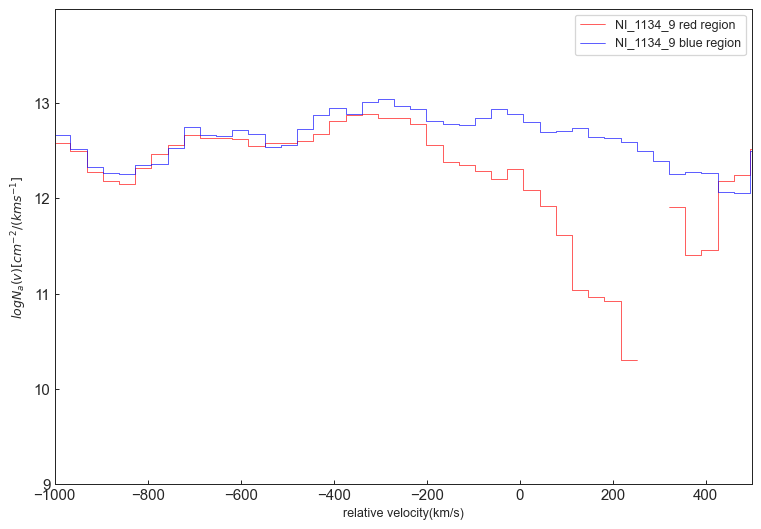

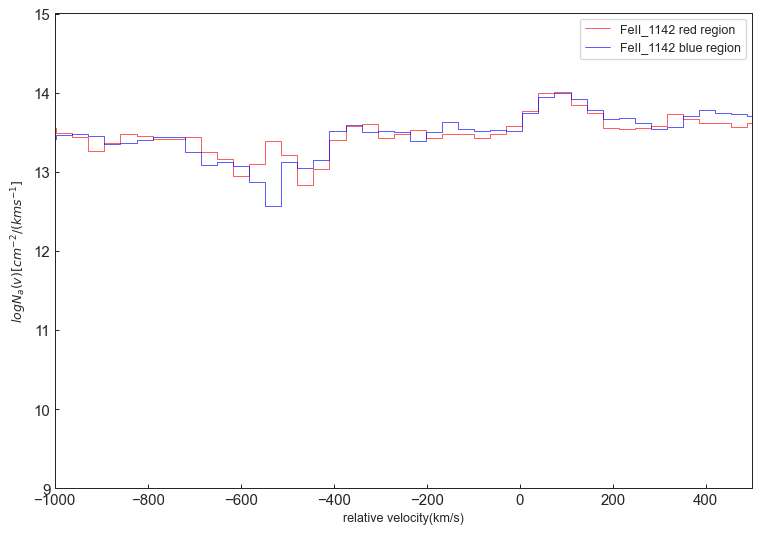

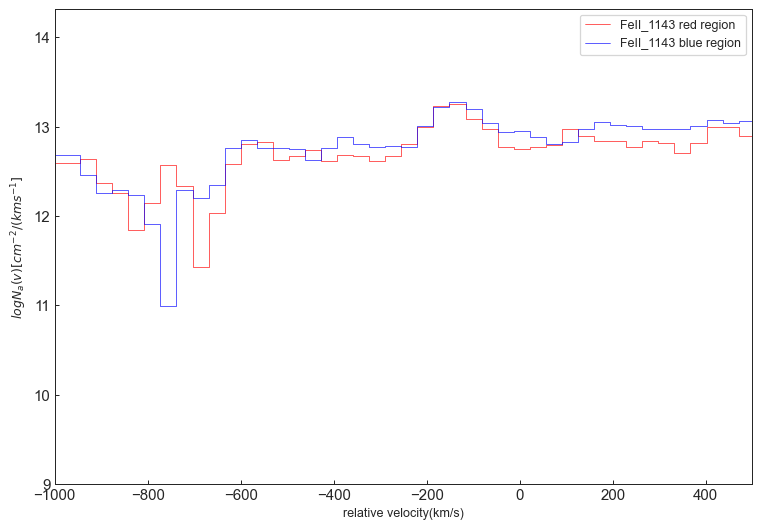

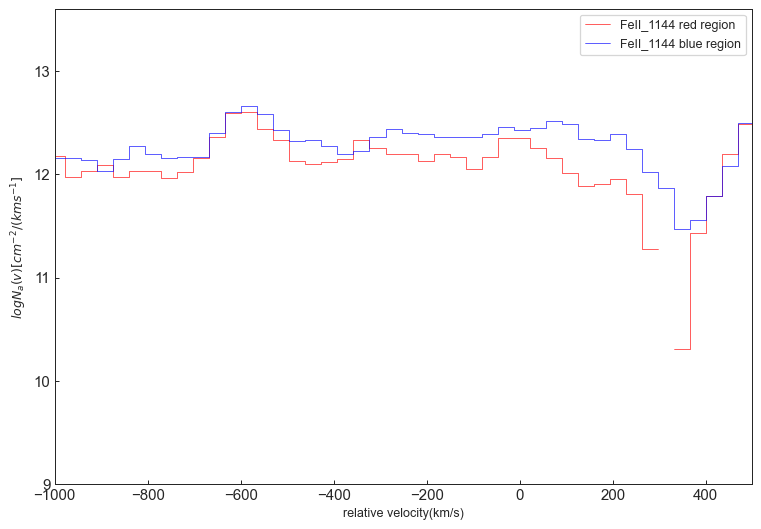

In [10]:
# bluelines1
blines_to_measure = list(bluelines1.values())

fig = plt.figure(num=1,figsize=(10,7),dpi=90)
cold_prof2(('NI_1200.2', 1200.2233),8.69E-02,rnorm,'red',1)
cold_prof2(('NI_1200.2', 1200.2233),8.69E-02,bnorm,'blue',1)

fig = plt.figure(num=2,figsize=(10,7),dpi=90)
cold_prof2(('NI_1134_9', 1134.9803),4.16E-02,rnorm,'red',1) 
cold_prof2(('NI_1134_9', 1134.9803),4.16E-02,bnorm,'blue',1)

fig = plt.figure(num=3,figsize=(10,7),dpi=90)
cold_prof2(('FeII_1142', 1142.3656),4.01E-03,rnorm,'red',1) 
cold_prof2(('FeII_1142', 1142.3656),4.01E-03,bnorm,'blue',1)

fig = plt.figure(num=4,figsize=(10,7),dpi=90)
cold_prof2(('FeII_1143', 1143.226),1.92E-02,rnorm,'red',1) 
cold_prof2(('FeII_1143', 1143.226),1.92E-02,bnorm,'blue',1)

fig = plt.figure(num=5,figsize=(10,7),dpi=90)
cold_prof2(('FeII_1144', 1144.9379),8.30E-02,rnorm,'red',1) 
cold_prof2(('FeII_1144', 1144.9379),8.30E-02,bnorm,'blue',1)

#f-values from Donald C. Morton 10.1086/377639

In [11]:
# low ionization optical depth comparison
xvals = np.linspace(-1500,1500,106) * u.km/u.s
def abslines_od(absline,norm_data,mask=None): # mask tuple of (min,max)
    od = np.log(1/norm_data.value)
    yinterp = np.interp(xvals, velo(absline), od)
    if mask==None:
        return yinterp
    else:
        window = (xvals.value<mask[0]) | (xvals.value>mask[1])
        masked_arr = np.where(window, yinterp, np.nan)
        
        return masked_arr


low_od_r = np.array([abslines_od(('SiIIa', 1260.4221),rnorm),
                        abslines_od(("CII", 1334.5323),rnorm),
                        abslines_od(('OI', 1302.1685),rnorm,(400,798)),
                        abslines_od(('SiIIb', 1304.3702),rnorm,(-700,-190))])

low_od_b = np.array([abslines_od(('SiIIa', 1260.4221),bnorm),
                        abslines_od(("CII", 1334.5323),bnorm),
                        abslines_od(('OI', 1302.1685),bnorm,(400,798)),
                        abslines_od(('SiIIb', 1304.3702),bnorm,(-700,-190))])

norm_data = (rnorm,bnorm)
low_od = (low_od_r,low_od_b)
od = (od_r,od_b)
od_err = (od_r_err,od_b_err)

opp = np.where((velo(("SiIIb", 1304.3702)).value<-700) | (velo(("SiIIb", 1304.3702)).value>-200), velo(("SiIIb", 1304.3702)), np.nan)
opp1 = np.where((velo(("OI", 1302.1685)).value<400) | (velo(("OI", 1302.1685)).value>798), velo(("OI", 1302.1685)), np.nan)

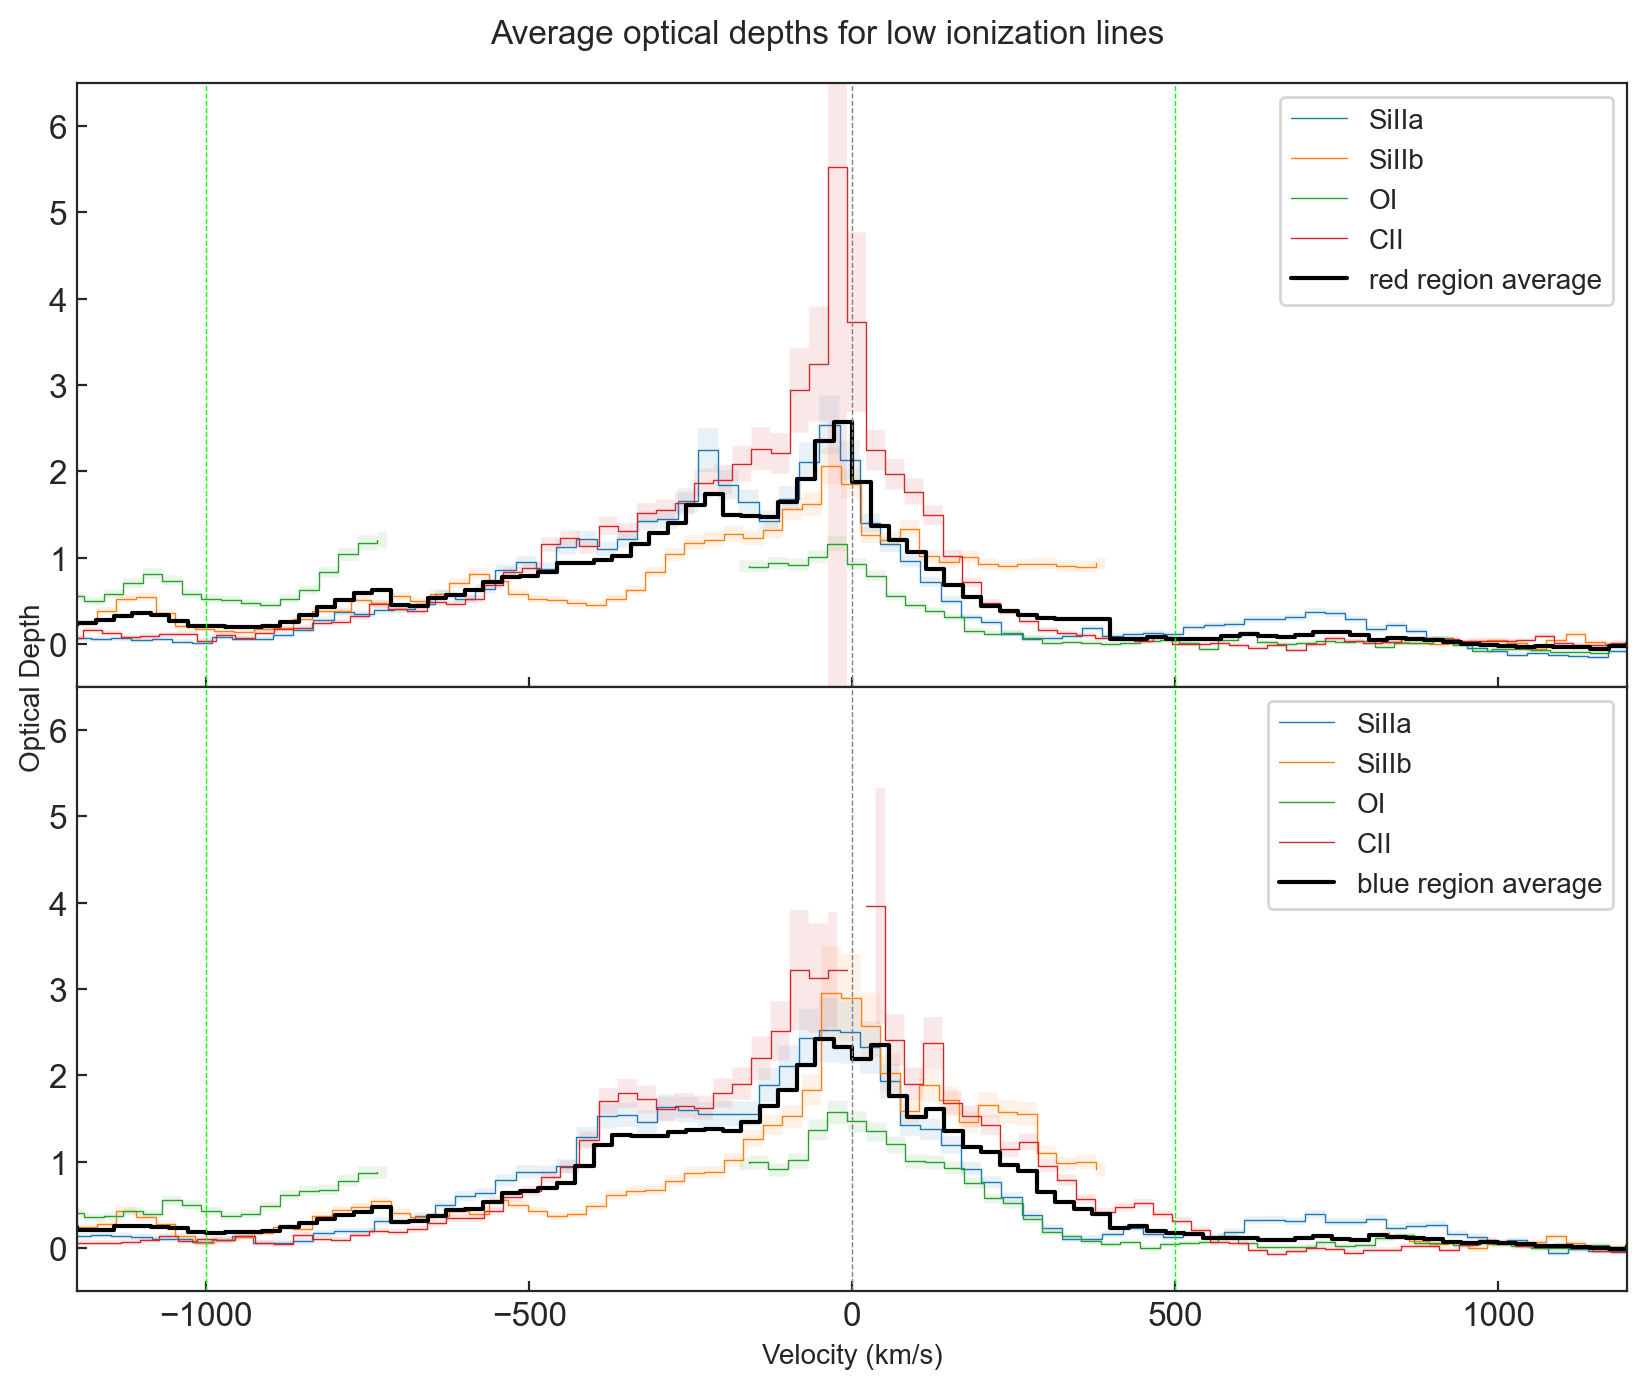

In [12]:
fig,ax = plt.subplots(len(norm_data),1,sharex=True,sharey=True,figsize=(10,len(norm_data)*4),dpi=200)
for i in range(len(norm_data)):
    ax[i].plot(velo(("SiIIa", 1260.4221)),od[i],lw=0.5,drawstyle='steps-mid',label='SiIIa')
    ax[i].plot(opp1,od[i],lw=0.5,drawstyle='steps-mid',label='SiIIb')
    ax[i].plot(opp,od[i],lw=0.5,drawstyle='steps-mid',label="OI")
    ax[i].plot(velo(("CII", 1334.5323)),od[i],lw=0.5,drawstyle='steps-mid',label="CII")


    ax[i].fill_between(velo(("SiIIa", 1260.4221)), od[i]-od_err[i], od[i]+od_err[i], step='mid', alpha =0.1)
    ax[i].fill_between(opp1, od[i]-od_err[i], od[i]+od_err[i], step='mid', alpha =0.1)
    ax[i].fill_between(opp, 
                        od[i]-od_err[i], od[i]+od_err[i], step='mid', alpha =0.1)
    ax[i].fill_between(velo(("CII", 1334.5323)), 
                        od[i]-od_err[i], od[i]+od_err[i], step='mid', alpha =0.1)
    # average profile
    ax[i].plot(xvals,np.nanmean(low_od[i],axis=0),color='k',label='%s region average'%col[i],drawstyle="steps-mid")
    
    ax[i].axvline(-1000,color='lime',ls='--',lw=0.5)
    ax[i].axvline(500,color='lime',ls='--',lw=0.5)
    ax[i].axvline(0,color='gray',ls='--',lw=0.5)
    ax[i].set_xlim(-1200,1200)
    ax[i].set_ylim(-0.5,6.5)
    ax[i].legend()
ax[0].get_shared_x_axes().join(ax[0], ax[1])
ax[1].set_xlabel('Velocity (km/s)')
ax[1].yaxis.set_label_coords(-0.02,1)
ax[1].set_ylabel('Optical Depth')
plt.suptitle('Average optical depths for low ionization lines',y=0.92)
plt.subplots_adjust(hspace=0)

# plt.savefig('low_ion_optd.png')
plt.show()

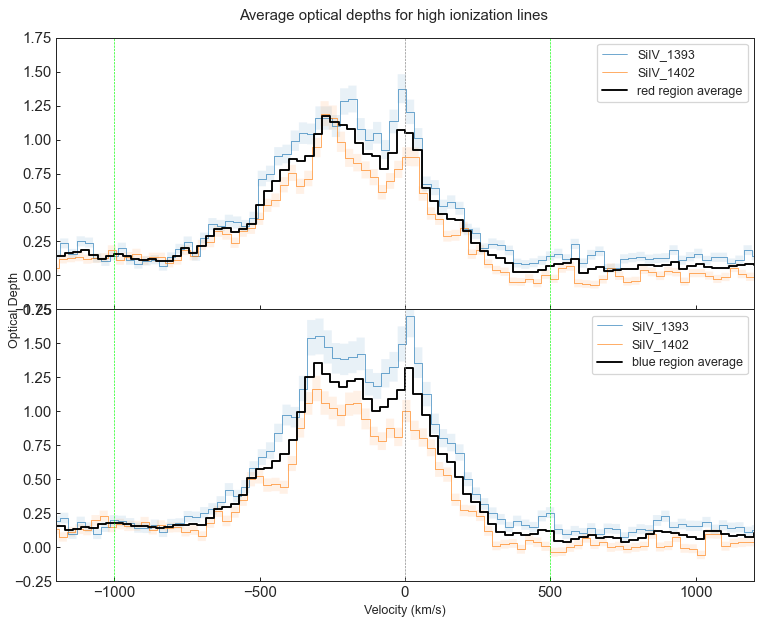

In [13]:
# high ionization comparison
high_od_r = np.nanmean((abslines_od(('SiIV_1393', 1393.75),rnorm),
                        abslines_od(('SiIV_1402', 1402.75),rnorm)),axis=0)
high_od_b = np.nanmean((abslines_od(('SiIV_1393', 1393.75),bnorm),
                        abslines_od(('SiIV_1402', 1402.75),bnorm)),axis=0)

high_od = (high_od_r,high_od_b)
fig,ax = plt.subplots(len(norm_data),1,sharex=True,figsize=(10,len(norm_data)*4),dpi=90)
for i in range(len(norm_data)):
    for j in high_ion.items():
        ax[i].plot(velo(j),od[i],lw=0.5, drawstyle="steps-mid",label='%s'%j[0])
        ax[i].fill_between(velo(j), od[i]-od_err[i], od[i]+od_err[i], step='mid', alpha =0.1)
    ax[i].plot(xvals,high_od[i],color='k',label='%s region average'%col[i],drawstyle="steps-mid")
    ax[i].axvline(-1000,color='lime',ls='--',lw=0.5)
    ax[i].axvline(500,color='lime',ls='--',lw=0.5)
    ax[i].axvline(0,color='gray',ls='--',lw=0.5)
    ax[i].set_xlim(-1200,1200)
    ax[i].set_ylim(-0.25,1.75)
    ax[i].legend()
ax[0].get_shared_x_axes().join(ax[0], ax[1])
ax[1].set_xlabel('Velocity (km/s)')
ax[1].yaxis.set_label_coords(-0.05,1)
ax[1].set_ylabel('Optical Depth')
plt.suptitle('Average optical depths for high ionization lines',y=0.92)
plt.subplots_adjust(hspace=0)

plt.savefig('low_ion_optd.png')
plt.show()

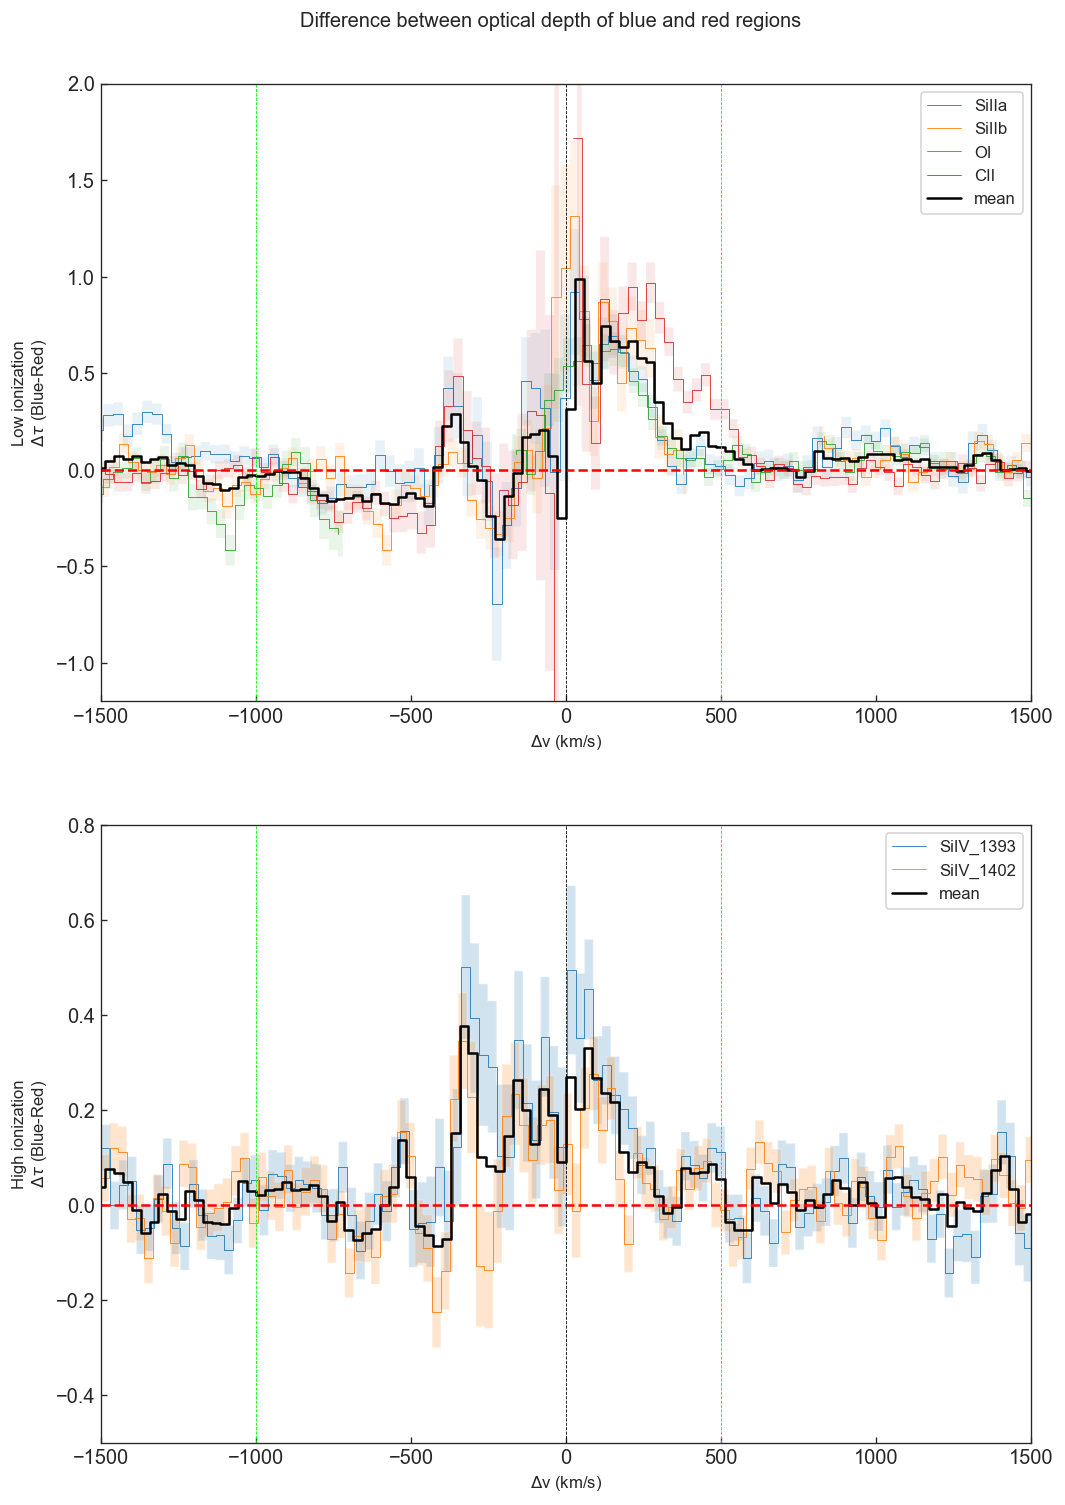

In [14]:

# difference plot for optical depths
fig, ax = plt.subplots(2,1,figsize=(10,15),dpi=120)

# axis1
# --------------------------------------------------
ax[0].set_ylabel('Low ionization' '\n' r'$\Delta \tau$ (Blue-Red)',fontsize=10)

ax[0].plot(velo(("SiIIa", 1260.4221)),od[1]-od[0],lw=0.5,drawstyle='steps-mid',label='SiIIa')
ax[0].plot(opp1,od[1]-od[0],lw=0.5,drawstyle='steps-mid',label='SiIIb')
ax[0].plot(opp,od[1]-od[0],lw=0.5,drawstyle='steps-mid',label="OI")
ax[0].plot(velo(("CII", 1334.5323)),od[1]-od[0],lw=0.5,drawstyle='steps-mid',label="CII")


ax[0].fill_between(velo(("SiIIa", 1260.4221)), od[1]-od[0]-od_diff_err, od[1]-od[0]+od_diff_err, step='mid', alpha =0.1)
ax[0].fill_between(opp1, od[1]-od[0]-od_diff_err, od[1]-od[0]+od_diff_err, step='mid', alpha =0.1)
ax[0].fill_between(opp, 
                    od[1]-od[0]-od_diff_err, od[1]-od[0]+od_diff_err, step='mid', alpha =0.1)
ax[0].fill_between(velo(("CII", 1334.5323)), 
                    od[1]-od[0]-od_diff_err, od[1]-od[0]+od_diff_err, step='mid', alpha =0.1)
ax[0].plot(xvals,np.nanmean(low_od[1],axis=0)-np.nanmean(low_od[0],axis=0),'k',drawstyle='steps-mid',label='mean')
ax[0].set_ylim(-1.2,2)
# axis2
# --------------------------------------------------
ax[1].set_ylabel('High ionization' '\n' r'$\Delta \tau$ (Blue-Red)',fontsize=10)
for j in high_ion.items():
    ax[1].plot(velo(j),od[1]-od[0],lw=0.5,drawstyle='steps-mid',label='%s'%j[0])
    ax[1].fill_between(velo(j), od[1]-od[0]-od_diff_err, od[1]-od[0]+od_diff_err, step='mid', alpha =0.2)
ax[1].plot(xvals,high_od[1]-high_od[0],'k',drawstyle='steps-mid',label='mean')
ax[1].set_ylim(-0.5,0.8)

for i in range(len(norm_data)):
    ax[i].axhline(0,color='r',ls='--')
    ax[i].axvline(-1000,color='lime',ls='--',lw=0.5)
    ax[i].axvline(500,color='lime',ls='--',lw=0.5)
    ax[i].axvline(0,color='k',ls='--',lw=0.5)
    ax[i].set_xlim(-1500,1500)
    ax[i].legend()
    ax[i].set_xlabel(r'$\Delta$v (km/s)')
    # ax[i].set_ylabel(r'$\Delta \tau$ (Blue-Red)')
    # plt.subplots_adjust(hspace=0)

plt.suptitle('Difference between optical depth of blue and red regions',y=0.92)
# plt.savefig('optd_diff.png')
plt.show()

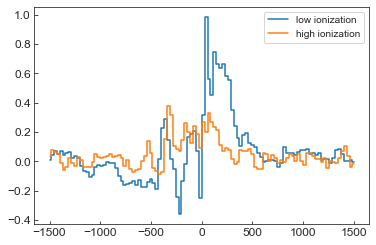

In [28]:
# define a function to fit a gaussian function to the average line profile

def func(x, *params):
    y = np.zeros_like(x)
    for i in range(0, len(params), 3):
        mu = params[i]
        A = params[i+1]
        sig = params[i+2]
        # off = params[i+3]
        y = y + A * np.exp( -((x - mu)/sig)**2)
    return y

def gauss(x, *params):
    for i in range(0, len(params), 4):
        mu = params[i]
        A = params[i+1]
        sig = params[i+2]
        off = params[i+3]
        y = A * np.exp( -((x - mu)/sig)**2) + off
        return y

od_mean = (np.nanmean(low_od[1],axis=0)-np.nanmean(low_od[0],axis=0),high_od[1]-high_od[0])
plt.plot(xvals,od_mean[0],drawstyle='steps-mid',label='low ionization')
plt.plot(xvals,od_mean[1],drawstyle='steps-mid',label='high ionization')
# plt.plot(xvals,np.nanmean(low_od[0],axis=0),drawstyle='steps-mid',label='low ionization')
plt.legend()
plt.show()

/Users/aaich/anaconda3/lib/python3.7/site-packages/scipy/optimize/minpack.py:834: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


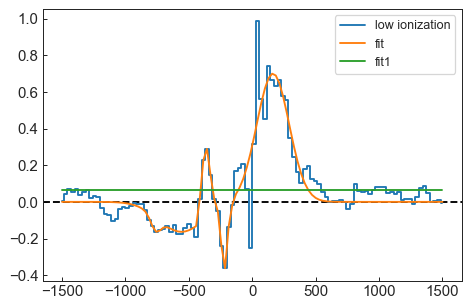

In [36]:
guess = [1, 1, 1, 1, 1, 0.1]
guess1 = [1, 1, 1, 1, 1, 0.1, 1]
iter = np.linspace(1,10,9)

for i in range(9):
    guess += [-500+50*i, 1, 15]
    guess1 += [-500+50*i, 1, 15]
popt, pcov = curve_fit(func, xvals, od_mean[0], p0=guess)
popt1, pcov1 = curve_fit(gauss, xvals, od_mean[0], p0=guess1)
# popt, pcov = curve_fit(func, xvals, np.nanmean(low_od[1],axis=0), p0=guess)
fit = func(xvals.value, *popt)
fit1 = gauss(xvals.value, *popt1)

plt.figure(num=1,dpi=90)
plt.axhline(0,color='k',ls='--')
plt.plot(xvals,od_mean[0],drawstyle='steps-mid',label='low ionization')
# plt.plot(xvals,np.nanmean(low_od[1],axis=0),drawstyle='steps-mid',label='low ionization red')
plt.plot(xvals,fit,label='fit')
plt.plot(xvals,fit1,label='fit1')
plt.legend()


/Users/aaich/anaconda3/lib/python3.7/site-packages/scipy/optimize/minpack.py:834: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/Users/aaich/anaconda3/lib/python3.7/site-packages/scipy/optimize/minpack.py:834: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/Users/aaich/anaconda3/lib/python3.7/site-packages/scipy/optimize/minpack.py:834: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/Users/aaich/anaconda3/lib/python3.7/site-packages/scipy/optimize/minpack.py:834: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/Users/aaich/anaconda3/lib/python3.7/site-packages/scipy/optimize/minpack.py:834: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


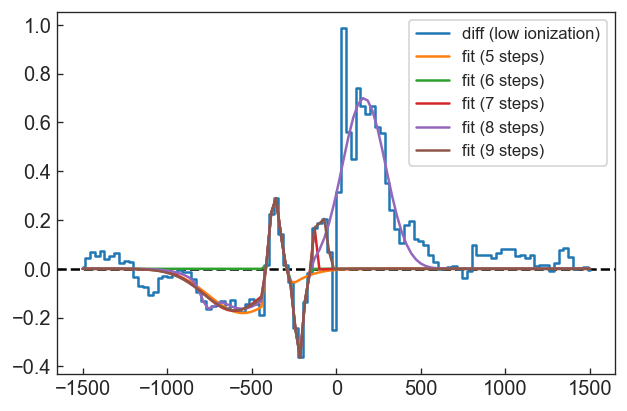

In [37]:
plt.figure(num=1,dpi=120)
plt.axhline(0,color='k',ls='--')
plt.plot(xvals,od_mean[0],drawstyle='steps-mid',label='diff (low ionization)')

ite = np.arange(6,11,1)
for j in ite:
    guess = [1, 1, 1, 1, 1, 0.1]
    for i in range(j):
        guess += [-500+50*i, 1, 15]
    popt, pcov = curve_fit(func, xvals, od_mean[0], p0=guess)
    fit = func(xvals.value, *popt)
    # plt.plot(xvals,np.nanmean(low_od[1],axis=0),drawstyle='steps-mid',label='low ionization red')
    plt.plot(xvals,fit,label='fit (%0.0f steps)'%i)
    plt.legend()

plt.show()



In [ ]:
#scan the entire spectrum for this model